In [1]:
%matplotlib inline

# COMPUTATION OF AN EPHEMERIS 

## Computation of an Ephemeris using Kepler's Laws of Planetary Motion


## Introduction

Computation of observation coordinates of a planet or other celestial body was a central task for astronomers for several millenia, and now it is also important for tracking asteroids and comets and other objects like artificial satelites, as well as used for Space navigation. The task is: if an orbit parameters of a body that moves in a Solar system are known, to be able to predict after period of time where would be that body, what would be its speed and distance from the Sun, and as well as where on the Sky would be observable that body after that period or at a certain date from the year. 

We all know the real revolution in computation of planetary motion started with the work of Jochannes Kepler, his 3 laws, and that gave new standard of precision at determining position of a planet or a comet. But how to apply those laws, to solve that task? Kepler gave us also the procedure how to make it, and he was able to calculate positions of the planets of the Solar system, publishing them at **Rudolphine Tables**, which were pretty accurate for the time allowing other astronomers to predict different events, several years later:

    "The tables were sufficiently accurate to predict a transit of Mercury observed by Pierre Gassendi in 1631 and a transit of Venus observed by Jeremiah Horrox in 1639.[14] Adam Schall von Bell, a Jesuit in China, used the tables to complete a reform of the Chinese calendar in 1635."
    
Kepler created these tables, pretty accurate for the time, without using a computer, so that triggered my curiocity expecting that, the method is computational effective.

The aim of this project is to demonstrate how to use only 3 Kepler's law and Kepler's approach for eliptical orbits, to calculate for some period of time, tables containing for each day the planet position, and its velocity, and as well as the observation coordinates at the Earth's Sky - declination and right ascension.

Nowadays we know this is just a very good aproximation, knowing that an orbit of a planet is perturbed by other planets, as well as Newtonian mechanic is also approximation, and more accurate General relativity describes gravity more accurate, but long time ago using Kepler's laws was sufficiently enough. The aim of this demonstration is to explore the method only.



## Kepler's Laws

In astronomy, Kepler's laws of planetary motion, published by Johannes Kepler between 1609 and 1619, describe the orbits of planets around the Sun. The laws modified the heliocentric theory of Nicolaus Copernicus, replacing its circular orbits and epicycles with elliptical trajectories, and explaining how planetary velocities vary. 

#### The three laws state that:

1. The orbit of a planet is an ellipse with the Sun at one of the two foci.

2. A line segment joining a planet and the Sun sweeps out equal areas during equal intervals of time.

3. The square of a planet's orbital period is proportional to the cube of the length of the semi-major axis of its orbit.

Later the laws were extended adding other conic sections for describing the motion of objects that are not trapped by Solar gravitation, and would visit our Solar system once and fly away, but here in this work the focus is only for objects that have closed orbits around the Sun - the orbit is an ellipse. 

## Ellipse

An ellipse is a figure that can be drawn by sticking two pins in a sheet of paper, tying a length of string to the pins, stretching the string taut with a pencil, and drawing the figure that results. During this process, the sum of the two distances from pencil to one pin and from pencil to the other pin remains constant and equal to the length of the string. This method of drawing an ellipse provides us with a formal definition

#### Definition

**An ellipse is the locus of a point that moves such that the sum of its distances from two fixed points called the foci is constant**

The picture below shows an ellipse, and $F_1$, $F_2$ are the two foci, and for any point $P$ from the ellipse, it is fulfilled:

$$
{F_1}P + {F_2}P = C = 2a
$$

$2a$ is a constant, and it is more convenient to use $2a$ for that constant instead of one letter $C$.

#### Elements of an ellipse

The sum of these two distances $2a$ is the length of the string that is used to draw the ellipse.

The ratio of the distance between the foci $\left|{F_1}{F_2}\right|$ to length of the string $2a$ is called the **eccentricity** $e$ of the ellipse:

$$ e = \frac{\left|{F_1}{F_2}\right|}{2a} $$

The midpoint $O$ of the line segment joining the foci ${F_1}{F_2}$ is called the center of the ellipse. 

The limmited by the ellipse part of the line through the foci ${F_1}{F_2}$ is called the **major axis**, and limmited by the ellipse part of the line perpendicular to the major axis through the center is called the **minor axis**. 

It can be prooven that the major axis is the **longest line segment** that connects two points of the ellipse. And the **shortest line segment** that passes via the center and connects two points of the ellipse is the minor axis.

It is easy to proof that the length of the major axis is $2a$ the same as the length of the string used to draw the ellipse. 

The length of the minor axis normally is denoted with $2b$.

Also the center of the ellipse is a midpoint of both the major and minor axis.

The major axis is shown as $AB$ and the minor axis is shown as $CD$


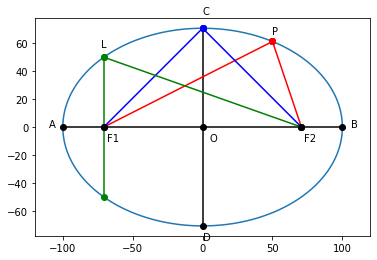

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

plt.axis("equal")

## draw an ellipse
## the method is "cheating" using auxiliary cirle and eccentric anomaly.

# eccentricity
e = math.sqrt(2)/2
# major semiaxis
a = 100 
# minor semiaxis
b = a*math.sqrt(1-e*e)
# eccentric anomaly, 
E = np.linspace(0, 2*math.pi, 1000)
# plot ellipse
x = a*np.cos(E)
y = b*np.sin(E)
plt.plot(x, y)

# two foci
xfl = -a*e;
xfr = a*e;

# ecc an for point p
EP = math.pi/3
xp = a*math.cos(EP)
yp = b*math.sin(EP)
plt.plot([xp], [yp], 'bo')
plt.annotate("P", xy=(xp, yp), xytext=(xp, yp+5))

x1, y1 = [-a,a], [0,0]
x2, y2 = [0, 0], [-b, b]
plt.plot(x1, y1, x2, y2, marker = 'o', color='k')
plt.annotate("A", xy=(-a, 0), xytext=(-a-10, 0))
plt.annotate("B", xy=(-a, 0), xytext=(+a+6, 0))
plt.annotate("C", xy=(-a, b), xytext=(0, b+10))
plt.annotate("D", xy=(-a, -b), xytext=(0, -b-10))

plt.plot([0], [0], marker = 'o', color='k')
plt.annotate("O", xy=(0, 0), xytext=(5, -10))

#draw fsking lines
x1, y1 = [xfl, xp], [0, yp]
x2, y2 = [xfr, xp], [0, yp]
plt.plot(x1, y1, x2, y2, marker = 'o', color='r')

x1, y1 = [xfl, 0], [0, b]
x2, y2 = [xfr, 0], [0, b]
plt.plot(x1, y1, x2, y2, marker = 'o', color='b')

#latus rectum
l = a*(1-e*e)
x1, y1 = [xfl, xfl], [-l, l]
x2, y2 = [xfr, xfl], [0, l]
plt.plot(x1, y1, x2, y2, marker = 'o', color='g')
plt.annotate("L", xy=(xfl, l), xytext=(xfl-2, l+7))

plt.plot([xfl], [0], 'ko')
plt.plot([xfr], [0], 'ko')
plt.annotate("F1", xy=(xfl, 0), xytext=(xfl+2, -10))
plt.annotate("F2", xy=(xfr, 0), xytext=(xfr+2, -10))

plt.show()


The half of the major axis is called **semi major axis**, and it has a length $a$. So the length of the string used to draw the ellipse is twice the length of semi major axis.

Semi major axis is one of the main orbital parameters, and the length of it is denoted with $a$.
$$ OA = OB = a $$ $$AB = 2a$$

Half of the minor axis is called **semi minor axis**, and the length of it is denoted with $b$.
$$ OC = OD = b $$ $$CD = 2b$$

The distance of the foci to the center is called the **focal distance** or **linear eccentricity** and it is denoted with $c$.
$$ O{F_1} = O{F_2} = c $$ $${F_1}{F_2} = 2c$$

Now we can see that the **eccentricity** is defined as:
$$
e = \frac{c}{a}
$$

#### Major semi axis and eccentricity fully defines the ellipse

Both major semi axis and the eccentricity are the two of all 6 parameters describing a planetary orbit.

If we know the **major semi axis** $a$ and the **eccentricity** $e$ the ellipse is fully defined. and we can find any other length on the ellipse:

**Linear eccentricity** 
$$ c = ae $$


From the definition for the point $C$ that belongs to the ellipse, we have:

$$
{F_1}C + {F_2}C = 2a
$$

But because the triangles ${F_1}OC$ and ${F_2}OC$ are equal then ${F_1}C = {F_2}C$, so we conclude that:

$$
    {F_1}C = {F_2}C = a
$$

And from Pytagorean theorem we have that

$$
    b^2 = a^2 - c^2 = a^2 - (ea)^2 = a^2(1-e^2)
$$

**Semi minor axis $b$**
$$
    b = a\sqrt{1-e^2}
$$


#### Perihelion and aphelion distances

In the theory of planetary orbits, the Sun will be at one focus. Let us suppose it to be at $F_2$. In that case the distance $F_2B$ is the **perihelion distance** $q$, and is equal to
$$
    q = a(1-e)
$$

The distance ${F_2}A$ is the aphelion distance Q (pronounced ap-helion by some and affelion by others − and both have defensible positions), and it is equal to

$$
    Q = a(1+e)
$$

#### Semi latus rectum 

A line parallel to the minor axis and passing through a focus is called a **latus rectum** (plural: latera recta). Half of it called **semi latus rectum** The length of a **semi latus rectum** is commonly denoted by $l$ (sometimes by $p$). 

$$
l = a(1 − e^2)
$$

Semi latus rectum length is obtained by applying Pythagorean theorem for the triangle ${F_1}{F_2}L$
$$
    l^2 = {L{F_1}}^2 = L{F_2}^2 - {F_1}{F_2}^2 = L{F_2}^2 -(2ae)^2
$$
and the definition of the ellipse for the point $L$
$$
    l + {F_2}L = {L{F_1}} + L{F_2} = 2a
$$
after replacing $L{F_2}$ in the equation we get 
$$
    l^2 = (2a-l)^2 -(2ae)^2 = 4a^2 -4al + l^2 - 4(ae)^2
$$
and we get the result
$$
l = a(1 − e^2)
$$

The length of the semi latus rectum is an important quantity in orbit theory. It will be found, for example, that the energy of a planet is closely related to the semi major axis a of its orbit, while its angular momentum is closely related to the semi latus rectum.

### Equation in Cartesian Coordinates


## Auxiliary Circle of an Ellipse

### Eccentric and True Anomaly

//TODO


## Polar Equation to the Ellipse

//TODO

### Argument of periapsis


## Second Kepler's Law Application

//TODO

### Angular momentum preservation


## Calculation of Mean and True Anomaly

//TODO



## Kepler's Equation

$$
M = E - e\,sin{E}
$$
//TODO



## Polar and Descartes Coordinates, and Speed. 

//TODO



## Computation of Ephemeris

//TODO

### Test data

https://en.wikipedia.org/wiki/46610_B%C3%A9sixdouze

https://en.wikipedia.org/wiki/Halley%27s_Comet

https://en.wikipedia.org/wiki/Mars

https://en.wikipedia.org/wiki/Earth

In [4]:
def p(n,s):
    if (n == 1):
        if ( s < 1 ) or ( s > 4 ):
            return 0
        else:
            return 1/4
    return (1/4)*(p(n-1,s-1)+p(n-1,s-2)+p(n-1,s-3)+p(n-1,s-4))

In [9]:
p(2,2)

0.0625

In [10]:
p(2,3)

0.125

In [16]:
p(15,25)

0.0012968257069587708